# Lab 1: Linear models
## Part 1: Classification 
The [Fashion-MNIST dataset](https://www.openml.org/d/40996) contains 70,000 images of Zalando fashion products, classified into 10 types of clothing, each represented by 28 by 28 pixel values. We's see how well we can classify these with linear models. Let's start with looking at our data:

In [1]:
# General imports. Make sure you have recent versions off all required libraries installed.
%matplotlib inline
from preamble import *
plt.rcParams['savefig.dpi'] = 150 # This controls the size of your figures

In [2]:
# Download FMINST data. Takes a while the first time.
fmnist = oml.datasets.get_dataset(40996)
X, y, _, _ = fmnist.get_data(target=fmnist.default_target_attribute); 
fmnist_classes = {0:"T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat", 5: "Sandal", 
                  6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle boot"}

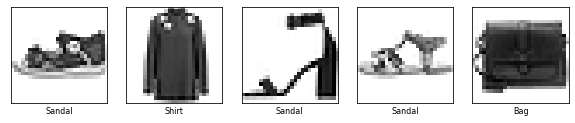

In [3]:
# Take some random examples, reshape to a 28x28 image and plot
from random import randint
fig, axes = plt.subplots (1, 5,  figsize=(10, 5))
for i in range(5):
    n = randint(0,70000)
    axes[i].imshow(X.values[n].reshape(28, 28), cmap=plt.cm.gray_r)
    axes[i].set_xlabel((fmnist_classes[int(y.values[n])]))
    axes[i].set_xticks(()), axes[i].set_yticks(())
plt.show()

## Exercise 1: A quick benchmark
First, we'll try the default [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) and [Linear SVMs](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html?highlight=linearsvc#sklearn.svm.LinearSVC). Click the links to read the documentation. We'll also compare it to [k-Nearest Neighbors](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) as a point of reference. To see whether our models are overfitting, we also evaluate the training set error. This can be done using [`cross_validate`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html) instead of  [`cross_val_scores`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score).

For now we are just interested in a quick approximation, so we don't use the full dataset for our experiments. Instead, we use 10% of our samples:

In [4]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier

# Take a 10% stratified subsample to speed up experimentation
Xs, _, ys, _ = train_test_split(X,y, stratify=y, train_size=0.1)

With this small sample of our data we can now train and evaluate the three classifiers.

### Exercise 1.1
Implement a function below which evaluates each classifier passed into it on the given data, and then returns both the train and test scores of each as a list. You are allowed to import additional functions from whichever module you like, but you should be able to complete the function with [`cross_validate`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html) function and standard Python built-ins. Below the function you will find example output.

In [19]:
def evaluate_learners(classifiers, X, y):
    """ Evaluate each classifier in 'classifiers' with cross-validation on the provided (X, y) data. 
    
    Given a list of scikit-learn classifiers [Classifier1, Classifier2, ..., ClassifierN] return two lists:
     - a list with the scores obtained on the training samples for each classifier,
     - a list with the test scores obtained on the test samples for each classifier.
     The order of scores should match the order in which the classifiers were originally provided. E.g.:     
     [Classifier1 train score, ..., ClassifierN train score], [Classifier1 test score, ..., ClassifierN test score]
    """
    train_scores = []
    test_scores = []
    for classifier in classifiers:
        scores = cross_validate(classifier, X, y, return_train_score=True, n_jobs=-1)
        train_scores.append(scores['train_score'])
        test_scores.append(scores['test_score'])
    return train_scores, test_scores
    
# # Example output:
# train_scores, test_scores = ([[0.92 , 0.924, 0.916, 0.917, 0.921],  # Classifier 1 train score for each of 5 folds.
#                               [0.963, 0.962, 0.953, 0.912, 0.934],  # Classifier 2 train score for each of 5 folds.
#                               [0.867, 0.868, 0.865, 0.866, 0.866]], # Classifier 3 train score for each of 5 folds.
#                              [[0.801, 0.811, 0.806, 0.826, 0.804],  # Classifier 1 test score for each of 5 folds.
#                               [0.766, 0.756, 0.773, 0.756, 0.741],  # Classifier 2 test score for each of 5 folds.
#                               [0.804, 0.814, 0.806, 0.821, 0.806]]) # Classifier 3 test score for each of 5 folds.

### Exercise 1.2
Call the function you created with a Logistic Regression, Linear SVM, and k-Nearest Neighbors Classifier.
Store the return values in the variables `train_scores` and `test_scores`. Then, run the code given below to produce a plot visualizing the scores.

In [21]:
classifiers = [LogisticRegression(), LinearSVC(), KNeighborsClassifier()]
train_scores, test_scores = evaluate_learners(classifiers, Xs, ys)

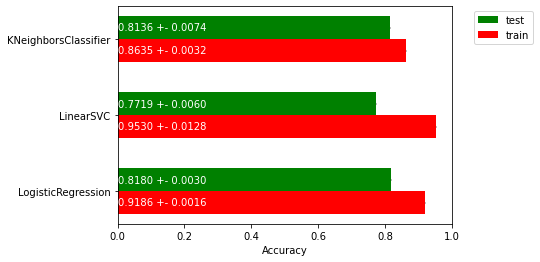

In [39]:
# Plot a bar chart of the train and test scores of all the classifiers, including the variance as error bars
fig, ax = plt.subplots()
width=0.3
ax.barh(np.arange(len(train_scores)), np.mean(test_scores, axis=1), width,
        yerr= np.std(test_scores, axis=1), color='green', label='test')
ax.barh(np.arange(len(train_scores))-width, np.mean(train_scores, axis=1), width,
        yerr= np.std(train_scores, axis=1), color='red', label='train')
for i, te, tr in zip(np.arange(len(train_scores)),test_scores,train_scores):
    ax.text(0, i, "{:.4f} +- {:.4f}".format(np.mean(te),np.std(te)), color='white', va='center')
    ax.text(0, i-width, "{:.4f} +- {:.4f}".format(np.mean(tr),np.std(tr)), color='white', va='center')
ax.set(yticks=np.arange(len(train_scores))-width/2, yticklabels=[c.__class__.__name__ for c in classifiers])
ax.set_xlabel('Accuracy')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)

plt.show()

### Exercise 1.3
Interpret the plot. Which is the best classifier? Are any of the models overfitting? If so, what can we do to solve this? Is there a lot of variance in the results?

The logistic regression classifier is best. The SVC classifier is probably overfitting a bit. We could try to apply some form of regularization. There is not much variance.

## Exercise 2: Regularization
We will now tune these algorithm's main regularization hyperparameter: the misclassification cost in SVMs (C), the regularization parameter in logistic regression (C), and the number of neighbors (n_neighbors) in kNN. We expect the optimum for the C parameters to lie in $[10^{-12},10^{12}]$ and for n_neighbors between 1 and 50. C should be varied on a log scale (i.e. [0.01, 0.1, 1, 10, 100]) and k should be varied uniformly (i.e. [1,2,3,4]).

### Exercise 2.1
Vary the regularization parameters in the range given above and, for each classifier, create a line plot that plots both the training and test score for every value of the regularization hyperparameter. Hence, you should produce 3 plots, one for each classifier. Use the default 5-fold cross validation for all scores, but only plot the means.

Hints:
* Think about the time complexity of these models. Trying too many hyperparameter values may take too much time.
* You can make use of numpy's [logspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.logspace.html), [geomspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.geomspace.html?highlight=geomspace#numpy.geomspace), and [linspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html#numpy.linspace) functions.
* You can use matplotlib's default [plot](https://matplotlib.org/tutorials/introductory/pyplot.html) function to plot the train and test scores.
* You can manually loop over the hyperparameter ranges, or you can already check out scikit-learn's [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) function to save some programming. We'll see it again later in the course.


In [74]:
print("\rtest", end="")
print("\rtwo", end="")

two

In [64]:
# subsample again for better performance
Xxs, _, yxs, _ = train_test_split(Xs, ys, stratify=ys, train_size=0.1)

In [88]:
try_C = 1e-6
lr = LogisticRegression(C=try_C)
scores = cross_validate(lr, Xxs, yxs, return_train_score=True, n_jobs=-1)

[0.757 0.764 0.736 0.807 0.736]


In [95]:
the_X = Xs
the_y = ys

lr_scores = []
for try_C in np.logspace(-12, 12, num=25):
    print("\rLogReg {}".format(try_C), end="")
    lr = LogisticRegression(C=try_C)
    scores = cross_validate(lr, the_X, the_y, return_train_score=True, n_jobs=-1)
    lr_scores.append((try_C, np.mean(scores['train_score']), np.mean(scores['test_score'])))

svc_scores = []
for try_C in np.logspace(-12, 12, num=25):
    print("\rSVC {}".format(try_C), end="")
    svc = LinearSVC(C=try_C)
    scores = cross_validate(svc, the_X, the_y, return_train_score=True, n_jobs=-1)
    svc_scores.append((try_C, np.mean(scores['train_score']), np.mean(scores['test_score'])))

knn_scores = []
for try_n in range(1, 21):
    print("\rKNN {}".format(try_n), end="")
    knn = KNeighborsClassifier(n_neighbors=try_n)
    scores = cross_validate(knn, the_X, the_y, return_train_score=True, n_jobs=-1)
    knn_scores.append((try_n, np.mean(scores['train_score']), np.mean(scores['test_score'])))

LogReg 0.01

KeyboardInterrupt: 

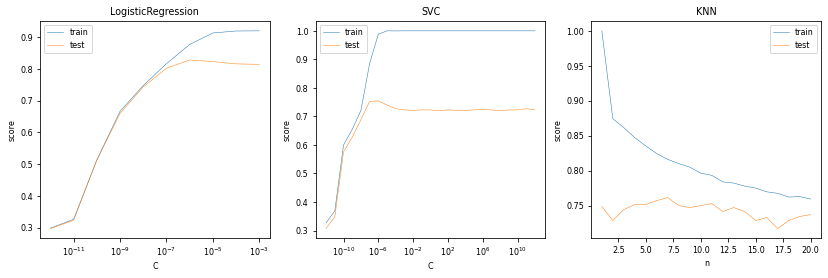

In [97]:
plt.figure(figsize=(14, 4))

x = [C for C, train, test in lr_scores]
ytest = [test for C, train, test in lr_scores]
ytrain = [train for C, train, test in lr_scores]

plt.subplot(131)
plt.title('LogisticRegression')
plt.plot(x, ytrain, label='train')
plt.plot(x, ytest, label='test')
plt.legend()
plt.xscale('log')
# plt.ylim(0, 1.1)
plt.xlabel('C')
plt.ylabel('score')

x = [C for C, train, test in svc_scores]
ytest = [test for C, train, test in svc_scores]
ytrain = [train for C, train, test in svc_scores]

plt.subplot(132)
plt.title('SVC')
plt.plot(x, ytrain, label='train')
plt.plot(x, ytest, label='test')
plt.legend()
plt.xscale('log')
# plt.ylim(0, 1.1)
plt.xlabel('C')
plt.ylabel('score')

x = [n for n, train, test in knn_scores]
ytest = [test for n, train, test in knn_scores]
ytrain = [train for n, train, test in knn_scores]

plt.subplot(133)
plt.title('KNN')
plt.plot(x, ytrain, label='train')
plt.plot(x, ytest, label='test')
plt.legend()
# plt.ylim(0, 1.1)
plt.xlabel('n')
plt.ylabel('score')

plt.show()

### Exercise 2.2
Interpret the plots. When are the methods underfitting? When are they overfitting? How sensitive are they to the regularization hyperparameter?

*Answer:* The logistic regression and SVC models underfit for roughly $C < 10^{-8}$ and overfit for $C > 10^{-6}$. The KNN model overfits for $1 < n < 4$, after that it diverges (maybe because I accidentally kept training the same model).

## Exercise 3: Interpreting misclassifications
Chances are that your models are not yet perfect. It is important to understand what kind of errors it still makes. Let's take a closer look at which instances are misclassified and which classes are often confused.
Train the logistic regression model with `C=1e-7`. Train the model on a training set, and make predictions for a test set (both sets should be  sampled from our 10% subsample).

In [5]:
# Create a stratified train-test split on a sample
X_train, X_test, y_train, y_test = train_test_split(Xs,ys, stratify=ys, random_state=0)

### Exercise 3.1
Train the classifier as described above, obtain the predictions `y_pred` on the test set, and identify all the misclassified samples `misclassified_samples`. Then, run the visualization code below to study the misclassifications

In [52]:
lr = LogisticRegression(C=1e-7)
lr.fit(X_train, y_train)

# Implement the code to obtain the actual predictions on the test set
y_pred = lr.predict(X_test)

# Implement the code to obtain the indices of the misclassified samples
# Example output:
# misclassified_samples = [  11,   12,   14,   23,   30,   34,   39,   46,   50,   52,   55]
misclassified_samples = [i for i in range(len(y_test)) if y_pred[i] != y_test.values[i]]
print(misclassified_samples)

[4, 10, 20, 29, 34, 38, 40, 44, 48, 49, 52, 53, 57, 65, 66, 76, 78, 85, 86, 89, 90, 97, 99, 101, 108, 109, 111, 123, 129, 134, 138, 144, 148, 150, 180, 181, 188, 196, 199, 201, 206, 211, 216, 221, 224, 225, 228, 231, 234, 238, 245, 250, 252, 262, 270, 271, 274, 275, 276, 284, 286, 290, 298, 299, 302, 303, 304, 305, 309, 314, 317, 321, 322, 324, 327, 334, 335, 336, 341, 343, 344, 349, 360, 368, 374, 375, 385, 386, 390, 391, 393, 394, 395, 403, 404, 412, 416, 418, 419, 422, 436, 450, 451, 457, 458, 461, 462, 467, 470, 474, 483, 489, 490, 500, 501, 502, 507, 511, 515, 535, 547, 549, 552, 557, 560, 573, 577, 580, 582, 583, 593, 594, 605, 611, 614, 619, 623, 629, 630, 631, 634, 635, 636, 643, 646, 654, 668, 675, 682, 684, 690, 693, 701, 707, 708, 709, 711, 720, 728, 747, 749, 760, 762, 767, 769, 771, 777, 778, 781, 785, 789, 791, 794, 796, 799, 804, 806, 813, 819, 820, 833, 836, 856, 866, 875, 876, 877, 879, 880, 888, 889, 895, 896, 900, 912, 918, 924, 932, 934, 952, 953, 956, 958, 964, 965

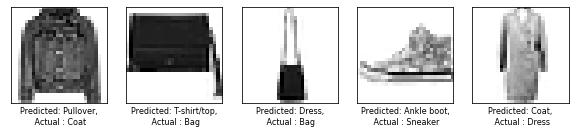

In [54]:
# Visualize the (first five) misclassifications, together with the predicted and actual class
fig, axes = plt.subplots(1, 5,  figsize=(10, 5))
for nr, i in enumerate(misclassified_samples[:5]):
    axes[nr].imshow(X_test.values[i].reshape(28, 28), cmap=plt.cm.gray_r)
    axes[nr].set_xlabel("Predicted: %s,\n Actual : %s" % (fmnist_classes[int(y_pred[i])],fmnist_classes[int(y_test.values[i])]))
    axes[nr].set_xticks(()), axes[nr].set_yticks(())

plt.show()

### Exercise 3.2
Interpret the results. Are these misclassifications to be expected? 

*Answer:* Yes, the misclassifications are somewhat expected, I would probably get it wrong for about half of those.

### Exercise 3.3.
Run the code below on your results to draw the complete confusion matrix and get more insight on the systematic misclassifications 
of your model. A confusion matrix shows the amount of examples in for each pair of true and predicted classes. Interpret the results. 
Does your model produce certain types of error more often than other types? 

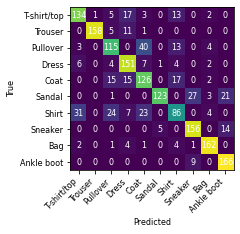

In [55]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots()
im = ax.imshow(cm)
ax.set_xticks(np.arange(10)), ax.set_yticks(np.arange(10))
ax.set_xticklabels(list(fmnist_classes.values()), rotation=45, ha="right")
ax.set_yticklabels(list(fmnist_classes.values()))
ax.set_ylabel('True')
ax.set_xlabel('Predicted')
for i in range(100):
    ax.text(int(i/10),i%10,cm[i%10,int(i/10)], ha="center", va="center", color="w")

*Answer:* It tends to confuse pullovers as coats, and shirts as t-shirts/tops. Different kinds of shoes are also confused

## Exercise 4: Interpreting model parameters
Finally, we'll take a closer look at the model parameters, i.e. the coefficients of our linear models. Since we are dealing with 28x28 pixel images, we have to learn 784 coefficients. What do these coefficients mean? We'll start by plotting them as 28x28 pixel images.

### Exercise 4.1
Train a Logistic Regression model and a Linear SVM using their tuned hyperparameters from exercise 2. 
When in doubt, use `C=1e-7` for LogReg and `C=1e-8` for the SVM. 
Pass the trained model to the provided plotting function. Interpret the results in detail. 
Why do you get multiple plots per model? What do the features represent in your data. 
Does it seems like the models pay attention to the right features?
Do you models seem to ignore certain features? Do you observe differences in quality between the different classes? Do you observe any differences between the models?

In [56]:
# Plots the coefficients of the given model as 28x28 heatmaps. 
# The `name` attribute is optional, it is simply a title for the produced figure
def plot_coefficients(model, name=None):
    fig, axes = plt.subplots(1,10,figsize=(20,2))
    fig.suptitle(name if name else model.__class__.__name__)
    for i, ax in enumerate(axes):
        m = ax.imshow(model.coef_[i].reshape(28,28))
        ax.set_xlabel(fmnist_classes[i])
        ax.set_xticks(()), ax.set_yticks(())
    fig.colorbar(m, ax=axes.ravel().tolist())

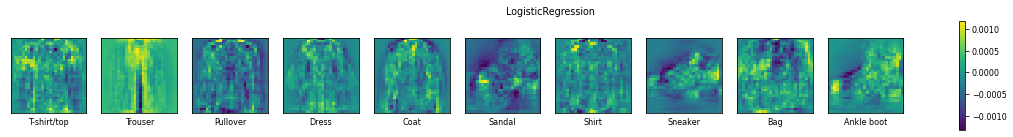

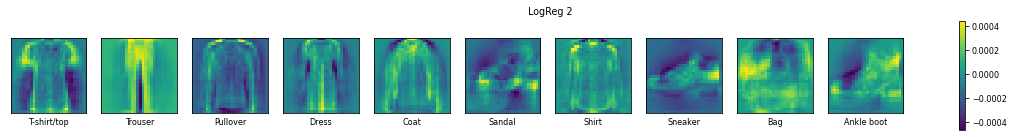

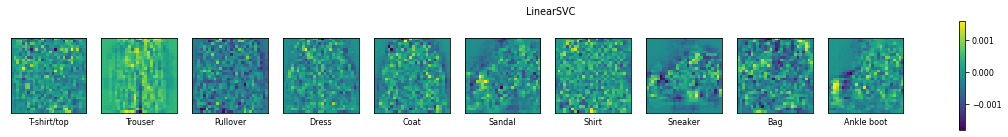

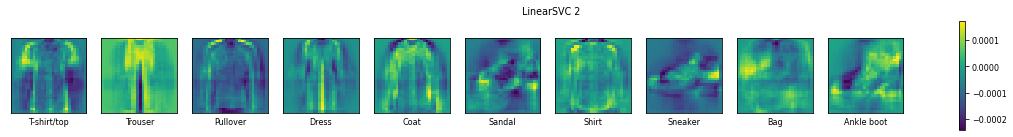

In [99]:
lr = LogisticRegression(C=1e-6)
lr.fit(X_train, y_train)

lr2 = LogisticRegression(C=1e-7)
lr2.fit(X_train, y_train)

svc = LinearSVC(C=1e-6)
svc.fit(X_train, y_train)

svc2 = LinearSVC(C=1e-8)
svc2.fit(X_train, y_train)

plot_coefficients(lr)
plot_coefficients(lr2, name="LogReg 2")
plot_coefficients(svc)
plot_coefficients(svc2, name="LinearSVC 2")

*Answer:* the coefficients show the expected values of the pixels for each class. The models seem like they are appropriate. Some classes almost always have an background, while some fill the picture more often. The SVM is much more noisy with the tuned hyperparameter.

### Exercise 4.2
Repeat the previous exercise, but now only with logistic regression. In addition to a tuned version, also add a model that overfits a lot and one that underfits a lot. Interpret and explain the results.

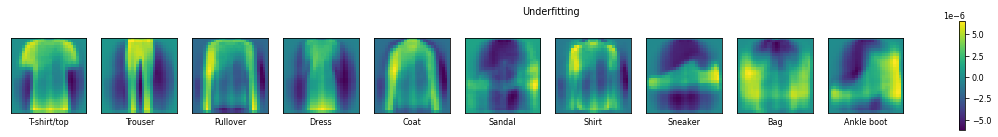

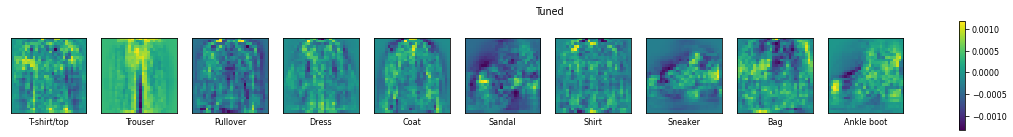

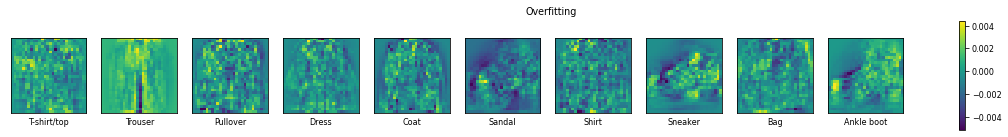

In [100]:
lr_uf = LogisticRegression(C=1e-10).fit(X_train, y_train)
lr_of = LogisticRegression(C=1e-2).fit(X_train, y_train)

plot_coefficients(lr_uf, name="Underfitting")
plot_coefficients(lr, name="Tuned")
plot_coefficients(lr_of, name="Overfitting")

The underfitting model produces a more blurry image, indicating that they are not quite as confident. The overfitting model produces more noise, meaning it might be giving too much weight to non-existing features.

## Part 2: Regression

The [NO2 dataset](https://www.openml.org/d/547) contains 500 measurement of pollution caused by cars. The goal is to predict the concentration of $NO_2$ from data about traffic and atmospheric conditions. The predictive variables include the number of cars per hour, temperature, wind, and time of day.

In [101]:
# General imports
%matplotlib inline
from preamble import *
plt.rcParams['savefig.dpi'] = 100 # This controls the size of your figures
from matplotlib import cm

In [122]:
# Download NO2 data. Takes a while the first time.
no2 = oml.datasets.get_dataset(547)
X, y, _, _ = no2.get_data(target=no2.default_target_attribute); 
attribute_names = list(X)

## Quick visualization
We can use pandas to quickly visualize the data. If you are new to pandas, take some time to understand the code.

We'll remove the 'day' feature to focus on the non-temporal aspects of this interaction. We are not aiming to predict future levels, and even if we would it would require special treatment (e.g. different train-test splits). There also doesn't seem to be a long term trend in the data, even though there are clear periodic trends in temperature.

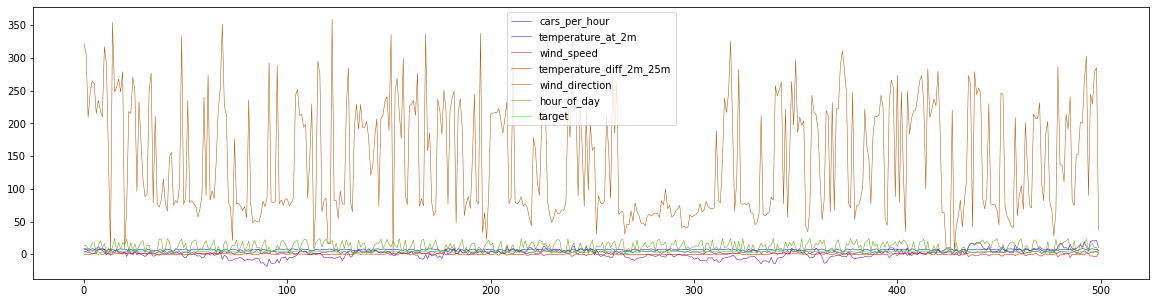

In [131]:
df = pd.DataFrame(X, columns=attribute_names).join(pd.DataFrame(list(y),columns=['target']))
df = df.sort_values(['day','hour_of_day']).drop(['day'],axis=1)
df.plot(use_index=False,figsize=(20,5),cmap=cm.get_cmap('brg'))
X = X.drop('day',axis=1)

In [137]:
df.head()

,cars_per_hour,temperature_at_2m,wind_speed,temperature_diff_2m_25m,wind_direction,hour_of_day,target
42,7.64,8.5,4.3,-0.2,322.0,13,3.22
20,7.75,8.2,4.5,0.2,307.0,14,3.15
255,8.12,5.2,2.8,0.3,209.0,8,4.20
488,7.64,6.7,2.3,-0.4,247.0,10,3.98
94,8.32,6.3,1.2,1.3,265.0,17,4.14


If we plot the data, ordered by time of measurement, we can see that the wind direction (measured in angular degrees) is scaled very differently from the other features. Let's now zoom in to the other measures:

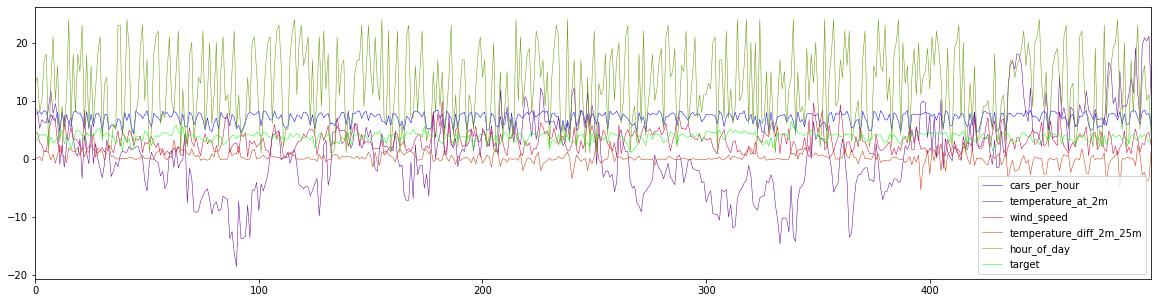

In [101]:
df.drop('wind_direction',axis=1).plot(use_index=False,figsize=(20,5),cmap=cm.get_cmap('brg'));

We can see that the target ($NO_2$ levels) seem to be correlated to the number of cars per hour, which makes sense because cars produce $NO_2$. Other influences (air temperature differences and wind) seem to have a more complex and subtle effect. Let's try to model these using linear regression models.

## Exercise 1: Model benchmark
It is clear that $NO_2$ concentrations depend on a combination of these features, so we will now try to learn this complex relationship. We first evaluate a range of linear regression problems, i.e. Linear Regression, Ridge, Lasso and ElasticNet, as well as kNN. Since we observed that somf features have very different scales, we'll also build pipelines of all these measures with an additional scaling step. For now, we'll stick to the default hyperparameter settings. 

### Exercise 1.1
Implement a function below which evaluates each classifier passed into it on the given data, and then returns both the train and test scores of each as a list. You are allowed to import additional functions from whichever module you like, but you should be able to complete the function with [`cross_validate`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html) function and standard Python built-ins. Below you the function you will find example output.

In [133]:
def evaluate_learners(models, X, y):
    """     
    Given a list of models [model1, model2, ..., modelN] return two lists:
     - a list with the scores obtained on the training samples for each model,
     - a list with the test scores obtained on the test samples for each model.
     The order of scores should match the order in which the models were originally provided. E.g.:     
     [Model1 train score, ..., ModelN train score], [Model1 test score, ..., ModelN test score]
    """
    train_scores = []
    test_scores = []
    for model in models:
        scores = cross_validate(model, X, y, return_train_score=True, n_jobs=-1)
        train_scores.append(scores['train_score'])
        test_scores.append(scores['test_score'])
    return train_scores, test_scores

# # Example output:
# train_scores, test_scores = ([[0.92 , 0.924, 0.916, 0.917, 0.921],  # Model 1 train score for each of 5 folds.
#                               [0.963, 0.962, 0.953, 0.912, 0.934],  # Model 2 train score for each of 5 folds.
#                               ..
#                              [[0.801, 0.811, 0.806, 0.826, 0.804],  # Model 1 test score for each of 5 folds.
#                               [0.766, 0.756, 0.773, 0.756, 0.741],  # Model 2 test score for each of 5 folds.
#                               ..

### Exercise 1.2
Call the function you created with a Linear Regression, Ridge, Lasso and ElasticNet, as well as kNN.
Store the return values in the variables `train_scores` and `test_scores`. Then, run the code given below to produce a plot visualizing the scores.

In [142]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor

models = [LinearRegression(), Ridge(), Lasso(), ElasticNet(), KNeighborsRegressor()]
train_scores, test_scores = evaluate_learners(models, X, y)

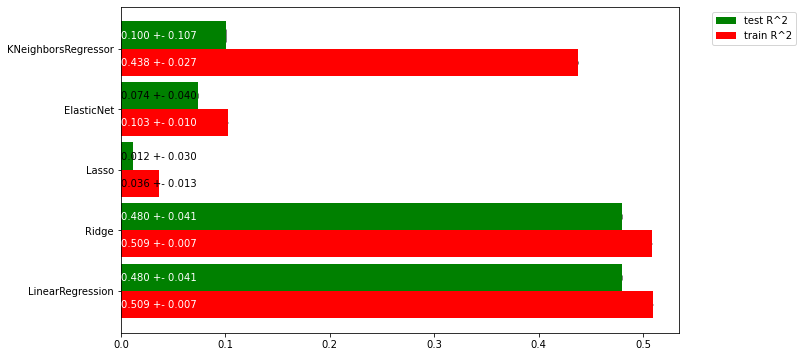

In [143]:
# Plot a bar chart of the train and test scores of all the classifiers, including the variance as error bars
fig, ax = plt.subplots(figsize=(10,6))
width=0.45

ax.barh(np.arange(len(train_scores)), np.mean(test_scores, axis=1), width,
        yerr= np.std(test_scores, axis=1), color='green', label='test R^2')
ax.barh(np.arange(len(train_scores))-width, np.mean(train_scores, axis=1), width,
        yerr= np.std(train_scores, axis=1), color='red', label='train R^2')
for i, te, tr in zip(np.arange(len(train_scores)),test_scores,train_scores):
    ax.text(0, i, "{:.3f} +- {:.3f}".format(np.mean(te),np.std(te)), color=('white' if np.mean(te)>0.1 else 'black'), va='center')
    ax.text(0, i-width, "{:.3f} +- {:.3f}".format(np.mean(tr),np.std(tr)), color=('white' if np.mean(tr)>0.1 else 'black'), va='center')
labels = [c.__class__.__name__ if not hasattr(c, 'steps') else c.steps[0][0] + "_" + c.steps[1][0] for c in models]
ax.set(yticks=np.arange(len(train_scores))-width/2, yticklabels=labels)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)

plt.show()

### Exercise 1.3
Interpret the plot. Which is the best regressor? Are any of the models overfitting? If so, what can we do to solve this? Is there a lot of variance in the results?

*Answer:* ridge and regular linear regression perform best. Lasso performs poorly and is overfitting. ElasticNet is also not too great. KNN is overfitting a lot. We may be able to solve this with regularization. The bad models have a relatively large variance in the results.

## Exercise 2: Regularization 
We will now tune these algorithm's main regularization hyperparameter: the regularization hyperparameter (`alpha`) in Lasso and Ridge, and the number of neighbors (`n_neighbors`) in kNN.

We expect the optimum for the alpha parameters to lie in $[10^{-12},10^{12}]$ and for n_neighbors between 1 and 50. alpha should be varied on a log scale (i.e. [0.01, 0.1, 1, 10, 100]), n_neighbors should be varied uniformly (i.e. [1,2,3,4]).

### Exercise 2.1
Vary the hyperparameters in the range given above and, for each regressor, create a line plot that plots both the training and test score for every value of the regularization hyperparameter. Hence, you should produce 3 plots, one for each regressor. Use the default 5-fold cross validation for all scores, but only plot the means.

Hints:
* Think about the time complexity of these models. Trying too many hyperparameter values may take too much time.
* You can make use of numpy's [logspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.logspace.html), [geomspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.geomspace.html?highlight=geomspace#numpy.geomspace), and [linspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html#numpy.linspace) functions.
* You can use matplotlib's default [plot](https://matplotlib.org/tutorials/introductory/pyplot.html) function to plot the train and test scores.
* You can manually loop over the hyperparameter ranges, or you can already check out scikit-learn's [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) function to save some programming. We'll see it again later in the course.

In [228]:
from sklearn.model_selection import GridSearchCV

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

alpha_space = np.logspace(-12, 12, num=25)
n_space = np.linspace(1, 50, num=25, dtype=int)

clf_ridge = GridSearchCV(Ridge(), {'alpha': alpha_space}, return_train_score=True)
clf_ridge.fit(X, y)

clf_lasso = GridSearchCV(Lasso(), {'alpha': alpha_space}, return_train_score=True)
clf_lasso.fit(X, y)

clf_knn = GridSearchCV(KNeighborsRegressor(), {'n_neighbors': n_space}, return_train_score=True)
clf_knn.fit(X, y)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 50])},
             return_train_score=True)

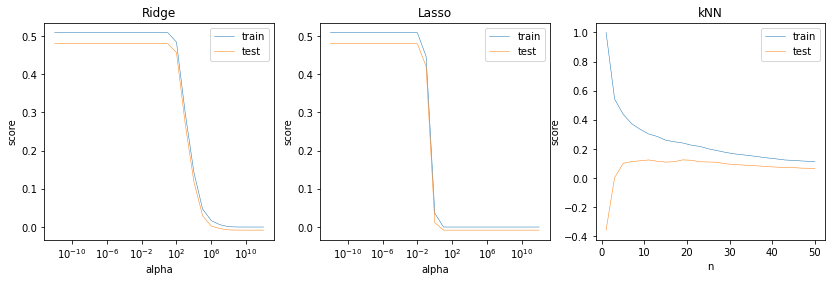

In [229]:
plt.figure(figsize=(14, 4))

plt.subplot(131)
plt.title('Ridge')
plt.plot(clf_ridge.cv_results_['param_alpha'].data, clf_ridge.cv_results_['mean_train_score'], label='train')
plt.plot(clf_ridge.cv_results_['param_alpha'].data, clf_ridge.cv_results_['mean_test_score'], label='test')
plt.legend()
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('score')

plt.subplot(132)
plt.title('Lasso')
plt.plot(clf_lasso.cv_results_['param_alpha'].data, clf_lasso.cv_results_['mean_train_score'], label='train')
plt.plot(clf_lasso.cv_results_['param_alpha'].data, clf_lasso.cv_results_['mean_test_score'], label='test')
plt.legend()
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('score')

plt.subplot(133)
plt.title('kNN')
plt.plot(clf_knn.cv_results_['param_n_neighbors'].data, clf_knn.cv_results_['mean_train_score'], label='train')
plt.plot(clf_knn.cv_results_['param_n_neighbors'].data, clf_knn.cv_results_['mean_test_score'], label='test')
plt.legend()
plt.xlabel('n')
plt.ylabel('score')

plt.show()

### Exercise 2.2
Interpret the plots. When are the methods underfitting? When are they overfitting? How sensitive are they to the regularization hyperparameter?

*Answer:* Ridge and Lasso are very sensitive and dramatically underfit for $\alpha > 1$, kNN overfits for $n < 8$.

### Exercise 2.3
ElasticNet allows to mix L1 and L2 loss, and the `l1_ratio` hyperparameter defines the ratio of L1 loss. Hence, it has two interacting hyperparameters: l1_ratio and alpha. Run a grid search to obtain a matrix of l1_ratio and alpha values and the resulting cross-validation scores. Then, use the function provided below to plot a heatmap of all values and interpret the result. Can you explain how the two hyperparameters interact?

In [188]:
# Generic heatmap
def heatmap(values, xlabel, ylabel, xticklabels, yticklabels, cmap=None,
            vmin=None, vmax=None, ax=None, fmt="%0.2f", printvalues=False):
    """
    Plots a heatmap for the performance of a model for every combination of two hyperparameter values
    
    values: nxn array with all evaluation results, varying the first hyperparameter first
    xlabel: name of the first hyperparameter
    ylabel: name of the second hyperparameter
    xticklabels: values of the first hyperparameter
    yticklabels: values of the second hyperparameter
    cmap: colormap
    vmin: minimal score
    vmax: maximal score
    ax: plot axes
    fmt: format for printing the scores
    printvalues: whether to print the scores
    """
    if ax is None:
        ax = plt.gca()
    img = ax.pcolor(values, cmap=cmap, vmin=None, vmax=None)
    img.update_scalarmappable()
    ax.set_xlabel(xlabel, fontsize=10)
    ax.set_ylabel(ylabel, fontsize=10)
    ax.set_xticks(np.arange(len(xticklabels)) + .5)
    ax.set_yticks(np.arange(len(yticklabels)) + .5)
    ax.set_xticklabels(xticklabels)
    ax.set_yticklabels(yticklabels)
    ax.set_aspect(1)
    
    ax.tick_params(axis='y', labelsize=12)
    ax.tick_params(axis='x', labelsize=12, labelrotation=90)

    if(printvalues):
        for p, color, value in zip(img.get_paths(), img.get_facecolors(), img.get_array()):
            x, y = p.vertices[:-2, :].mean(0)
            if np.mean(color[:3]) > 0.5:
                c = 'k'
            else:
                c = 'w'
            ax.text(x, y, fmt % value, color=c, ha="center", va="center", size=10)
    return img

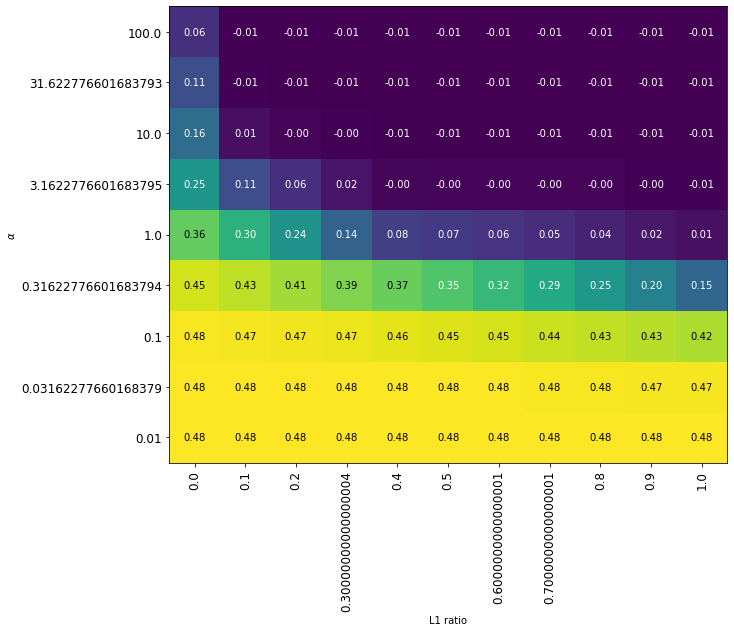

In [230]:
l1_ratio_space = np.linspace(0, 1, num=11)
alpha_space = np.logspace(-2, 2, num=9)

clf = GridSearchCV(ElasticNet(), {'l1_ratio': l1_ratio_space, 'alpha': alpha_space})
clf.fit(X, y)

plt.figure(figsize=(10, 10))
heatmap(
    values=clf.cv_results_['mean_test_score'].reshape(9, 11),
    xlabel="L1 ratio",
    ylabel="$\\alpha$",
    xticklabels=clf.cv_results_['param_l1_ratio'].data.reshape(9, 11)[0],
    yticklabels=clf.cv_results_['param_alpha'].data.reshape(9, 11)[:,0],
    printvalues=True
)

## Exercise 3: Visualizing coefficients
Finally, let's verify whether the different optimized linear models also find the same coefficients. 

### Exercise 3.1
Draw a [scatterplot](https://matplotlib.org/gallery/shapes_and_collections/scatter.html) plotting the coefficients of the different models in different colors. Do you see much difference between the different models?

For all models, choose an alpha parameter that seems to work well in the previous exercise. When in doubt, use alpha=0.001.

In [238]:
ridge = Ridge(alpha=0.01).fit(X, y)
lasso = Lasso(alpha=0.01).fit(X, y)

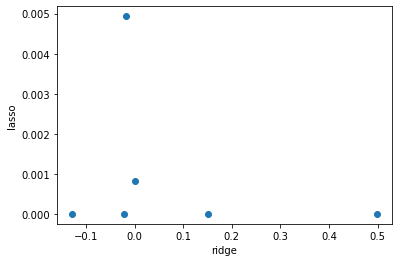

In [241]:
plt.scatter(ridge.coef_, lasso.coef_)
plt.xlabel("ridge")
plt.ylabel("lasso")
plt.show()

*Answer:* there is not much difference between the models

### Exercise 3.2
Redraw the same plot but now using a large amount of regularization (e.g. alpha=1). What do you observe? Does this help you explain the performance difference between Ridge and Lasso in exercise 1.2? 

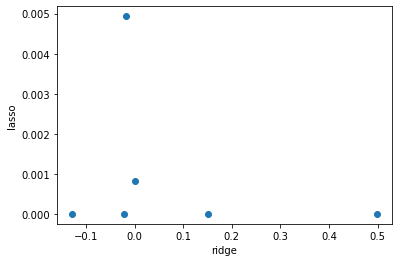

In [243]:
ridge = Ridge(alpha=1).fit(X, y)
lasso = Lasso(alpha=1).fit(X, y)
plt.scatter(ridge.coef_, lasso.coef_)
plt.xlabel("ridge")
plt.ylabel("lasso")
plt.show()

*Answer:* we now find that Ridge and Lasso give very different results. In exercise 1.2 we used the default values of $\alpha = 1$, so this makes sense.